**The question that is addressed in this notebook is to find the ratio between the number of shared and unshared prizes in each category.**

A shared prize is one that is won by more than one person or organizations in that specific year.

For example in a certain year, the nobel Physics Prize can be shared among two individuals, and in other years it can be received by only one person/organization.

In [40]:
#Importing all needed modules
import pandas as pd
import numpy as np
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)

import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
#Reading the data 
df = pd.read_csv("nobel.csv")

# Display dataframe
df
#Renaming to remove spaces
df.rename(columns={'Organization City':'OrganizationCity',
                          'Organization Country':'OrganizationCountry',
                  'Organization Name':'OrganizationName','Death City':'DeathCity',
                  'Death Country':'DeathCountry','Death Date':'DeathDate',
                   'Full Name':'FullName', 'Birth Date':'BirthDate'
                   
                  }, 
                 inplace=True)




Here we drop all columns that are not relevant to our question.

In [42]:
#Dropping columns
prize_share = df.drop({"DeathCountry", "DeathDate", "DeathCity", "Prize", "Motivation","Laureate Type", "FullName", "BirthDate", "Birth City", "Birth Country","Sex","OrganizationName",
                          "OrganizationCity","OrganizationCountry", "Laureate ID"}, axis=1)



The columns that are relevant must be checked for null values and imputed if necessary.

In [43]:

np.random.seed(0) 


#This is how we found the number of null values in each column
missing_values_count_df = prize_share.isnull().sum()
print(missing_values_count_df)

Year           0
Category       0
Prize Share    0
dtype: int64


Since Year, Category and Prize don't contain null and these are the relevant columns to answer our question,
we dont need to impute.

In [44]:
#Adding an isShared column that is true if the prized is shared
prize_share['isShared'] = df[['Prize Share']] != '1/1'

prize_share

,Year,Category,Prize Share,isShared
0,1901,Chemistry,1/1,False
1,1901,Literature,1/1,False
2,1901,Medicine,1/1,False
3,1901,Peace,1/2,True
4,1901,Peace,1/2,True
5,1901,Physics,1/1,False
6,1902,Chemistry,1/1,False
7,1902,Literature,1/1,False
8,1902,Medicine,1/1,False
9,1902,Peace,1/2,True


In [45]:

#Dropping the Prize Share column since it is no longer needed
prize_share = prize_share.drop({"Prize Share"}, axis=1)

prize_share



,Year,Category,isShared
0,1901,Chemistry,False
1,1901,Literature,False
2,1901,Medicine,False
3,1901,Peace,True
4,1901,Peace,True
5,1901,Physics,False
6,1902,Chemistry,False
7,1902,Literature,False
8,1902,Medicine,False
9,1902,Peace,True


Dropping the duplicates so as not to be counted more than once in our statistic.
The duplicate is where the category, prize share and year are the same.

In [46]:

prize_share = prize_share.drop_duplicates()




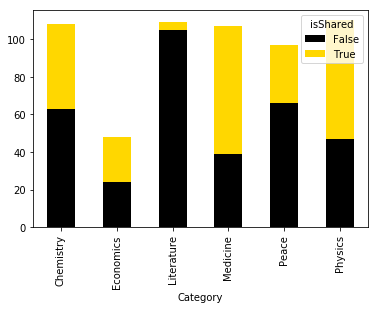

In [47]:
#Drawing a stacked chart that visualizes our desired ratio in each category
prize_share_graph = pd.crosstab([prize_share.Category], prize_share.isShared.astype(bool))
prize_share_graph.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)
#prize_share



**It is clear that Literature, Peace is mostly not shared.
Chemistry, economics and Physics is almost 50% of the time shared and the other 50% it is not shared.
Medecine is shared more than 50% of the time.**